In [1]:
#Чтение, объединение 
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
movies = pd.read_table('C:\movielens\movies.dat', delimiter='::',
         names=['MovieID','Film','Genre'], engine='python')  

rating = pd.read_table (r'C:\movielens\ratings.dat', delimiter='::',
         names=['UserID','MovieID','Rating','Timestamp'], engine='python')

users = pd.read_table (r'C:\movielens\users.dat', delimiter='::',
         names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')

rating = pd.merge(rating, users)
movies = pd.merge(movies, rating)
movies

,MovieID,Film,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
...,...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099,F,25,7,92120
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125,M,25,1,92120
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656,M,25,7,60607
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537,M,35,14,10003


In [2]:
#Средние рейтинги при группировке по полу
ratez = pd.pivot_table(movies, index='Film', columns='Gender', values='Rating', aggfunc='mean')
ratez

Gender,F,M
Film,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [3]:
#Средние рейтинги при группировке по возрасту
agez = pd.pivot_table(movies, index='Film', columns='Age', values='Rating')
agez

Age,1,18,25,35,45,50,56
Film,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,NaN
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN,NaN


In [4]:
#Средние рейтинги при группировке по полу в порядке убывания популярности у женской аудитории

FemRate = ratez.sort_values('F', axis=0, ascending=False)
FemRate

Gender,F,M
Film,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
...,...,...
With Friends Like These... (1998),NaN,4.000000
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN,3.000000
Year of the Horse (1997),NaN,3.250000


In [5]:
#Средние рейтинги по возрасту у самой старшей возрастной категории в порядке убывания

oldz = agez.sort_values(56, axis = 0,  ascending=False)
oldz

Age,1,18,25,35,45,50,56
Film,,,,,,,
Jude (1996),NaN,3.142857,3.642857,3.375000,3.500000,3.500000,5.0
"Decline of Western Civilization, The (1981)",4.0,3.500000,4.466667,4.411765,3.714286,3.500000,5.0
"Innocents, The (1961)",NaN,3.000000,4.200000,4.222222,3.250000,4.000000,5.0
"Conformist, The (Il Conformista) (1970)",NaN,4.000000,3.846154,4.125000,4.444444,4.384615,5.0
Wide Awake (1998),3.2,3.571429,3.470588,3.400000,3.285714,4.000000,5.0
...,...,...,...,...,...,...,...
Young and Innocent (1937),NaN,4.000000,3.000000,2.666667,3.000000,3.666667,NaN
Zachariah (1971),NaN,NaN,NaN,NaN,2.000000,5.000000,NaN
"Zed & Two Noughts, A (1985)",1.0,3.000000,3.375000,3.777778,4.000000,3.000000,NaN


In [6]:
#Больше 250 оценок
title = movies.groupby('Film')
leng  = title.size()
leng[leng >= 250]

Film
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [7]:
#Понравились женской аудитории
ratez = pd.pivot_table(movies, index='Film', columns='Gender', values='Rating', aggfunc='mean')
vs = ratez["F"] - ratez ["M"]
vs = vs.sort_values(ascending=False)
vs.head(15)

Film
James Dean Story, The (1957)                                   3.000000
Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)    3.000000
Country Life (1994)                                            3.000000
Babyfever (1994)                                               2.666667
Woman of Paris, A (1923)                                       2.571429
Cobra (1925)                                                   2.500000
Other Side of Sunday, The (S�ndagsengler) (1996)               2.071429
Theodore Rex (1995)                                            2.000000
For the Moment (1994)                                          2.000000
Separation, The (La S�paration) (1994)                         2.000000
To Have, or Not (1995)                                         2.000000
Mad Dog Time (1996)                                            2.000000
Crude Oasis, The (1995)                                        2.000000
Coming Apart (1969)                                        

In [8]:
#Понравились мужской аудитории
ratez = pd.pivot_table(movies, index='Film', columns='Gender', values='Rating', aggfunc='mean')
vs = ratez["M"] - ratez ["F"]
vs = vs.sort_values(ascending=False)
vs.head(15)

Film
Tigrero: A Film That Was Never Made (1994)     3.333333
Neon Bible, The (1995)                         3.000000
Enfer, L' (1994)                               2.750000
Stalingrad (1993)                              2.593750
Killer: A Journal of Murder (1995)             2.428571
Dangerous Ground (1997)                        2.333333
Rosie (1998)                                   2.333333
In God's Hands (1998)                          2.333333
Flying Saucer, The (1950)                      2.300000
Jamaica Inn (1939)                             2.142857
Kronos (1957)                                  2.111111
Show, The (1995)                               2.000000
Truce, The (1996)                              2.000000
Confessional, The (Le Confessionnal) (1995)    2.000000
Little Men (1998)                              2.000000
dtype: float64

In [9]:
math = movies
math.pop('MovieID')
math.pop('Genre')
math.pop('UserID')
math.pop('Timestamp')
math.pop('Occupation')
math.pop('Zip-code')
math

,Film,Rating,Gender,Age
0,Toy Story (1995),5,F,1
1,Toy Story (1995),4,F,50
2,Toy Story (1995),4,M,25
3,Toy Story (1995),5,M,25
4,Toy Story (1995),5,F,35
...,...,...,...,...
1000204,"Contender, The (2000)",4,F,25
1000205,"Contender, The (2000)",3,M,25
1000206,"Contender, The (2000)",4,M,25
1000207,"Contender, The (2000)",1,M,35


In [10]:
g = math[math['Gender'] == 'F']
b = math[math['Gender'] == 'M'] 

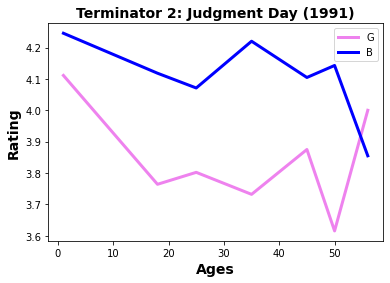

In [18]:
name = 'Terminator 2: Judgment Day (1991)'
i = [1,18,25,35,45,50,56]
kek = pd.pivot_table(g, index='Age', columns='Film', values='Rating', aggfunc=np.mean)
lol = pd.pivot_table(b, index='Age', columns='Film', values='Rating', aggfunc=np.mean)
plt.title(name, fontsize=14, fontweight="bold")
plt.xlabel("Ages", fontsize=14, fontweight="bold")
plt.ylabel("Rating", fontsize=14, fontweight="bold")
plt.plot(i, kek[name], color = 'violet', lw = 3)
plt.plot(i, lol[name], color = 'blue', lw = 3)
plt.legend('GB')